In [26]:
# imports
from commstools.core import Signal
from commstools.impairments import add_awgn

from commstools.mapping import gray_constellation
from commstools.logger import set_log_level
from commstools.plotting import filter_response, ideal_constellation

set_log_level("WARNING")


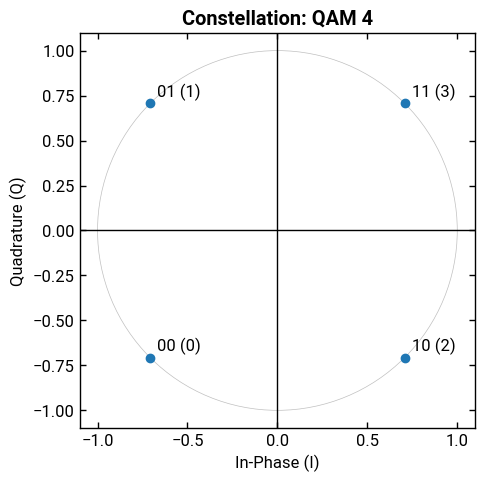

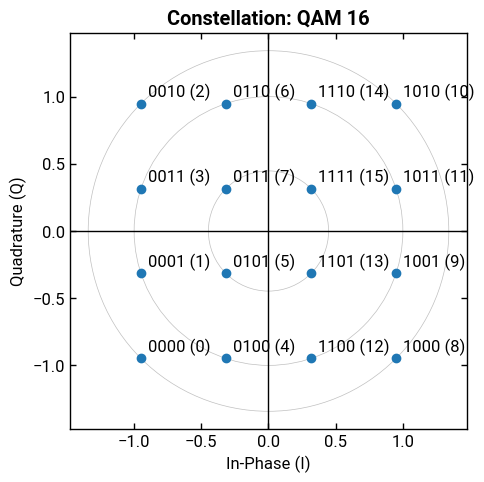

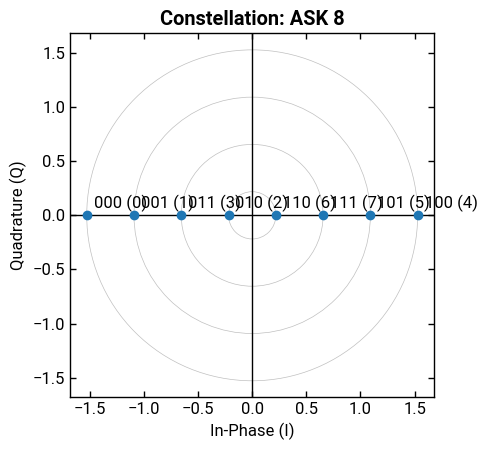

In [27]:
ideal_constellation(modulation="qam", order=4, show=True)
ideal_constellation(modulation="qam", order=16, show=True)
ideal_constellation(modulation="ask", order=8, show=True)


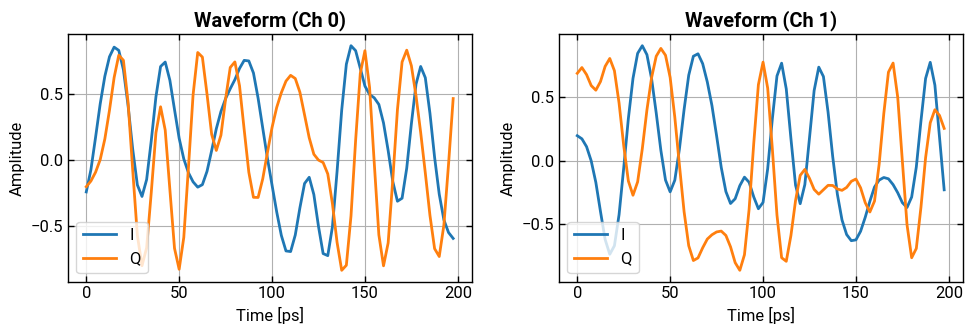

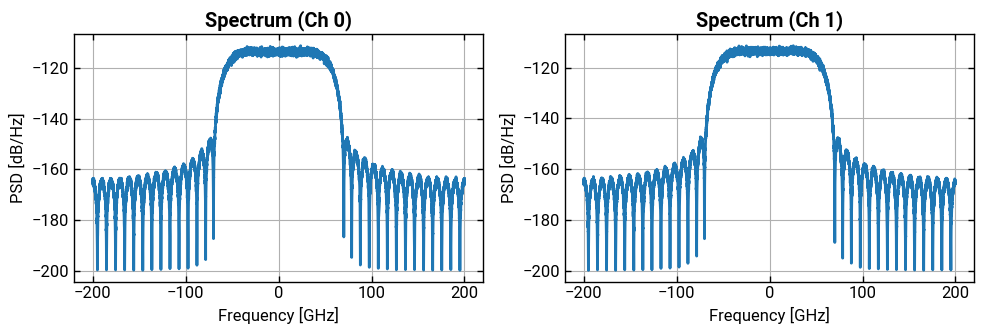

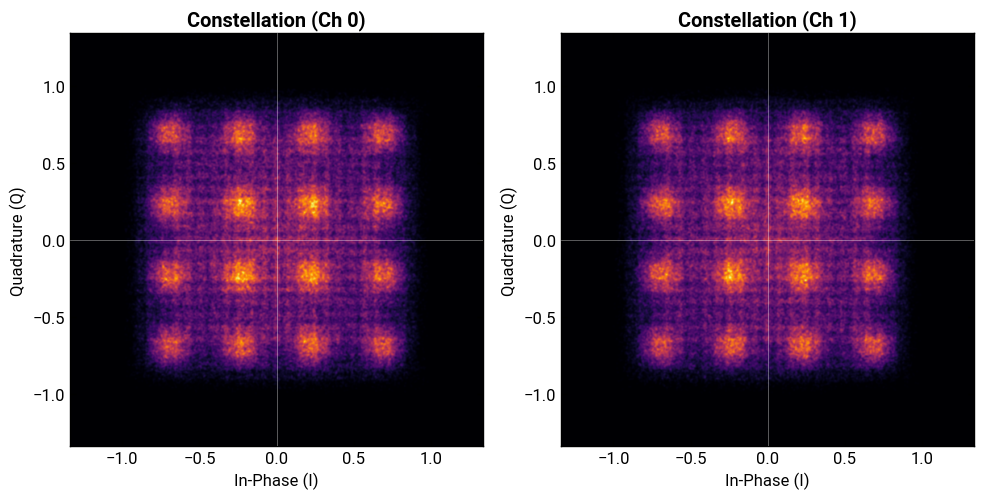

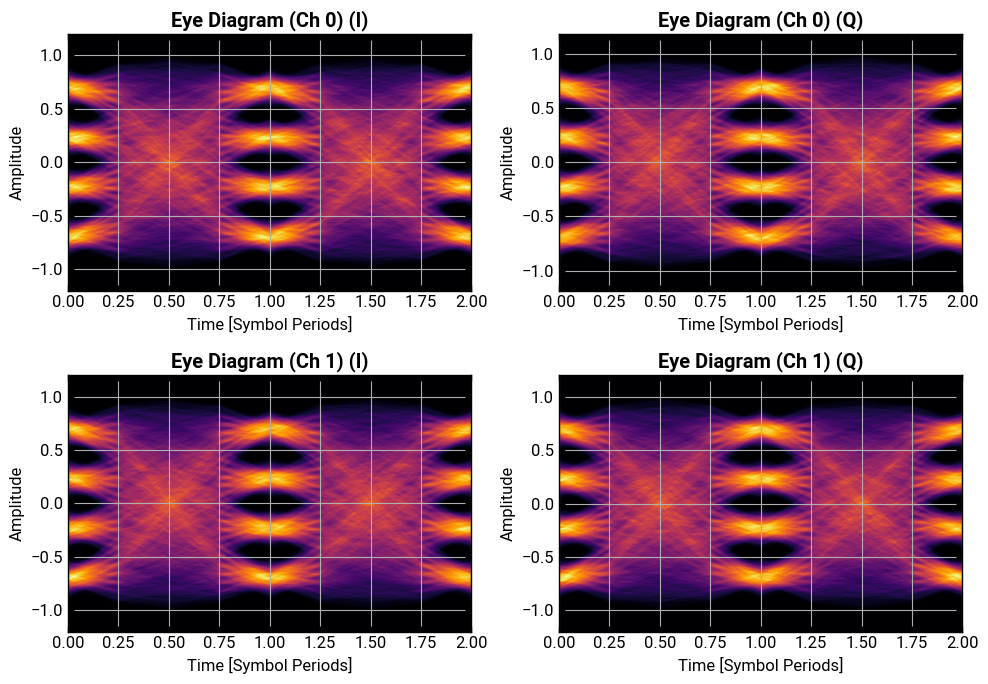

0.2953605


In [28]:
import numpy as np

symbol_rate = 100e9
sampling_rate = 400e9
sps = int(sampling_rate / symbol_rate)

sig_4qam = Signal.qam(
    order=16,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rrc",
    seed=43,
    num_streams=2,
)
sig_4qam.plot_symbols(num_symbols=20, show=True)
sig_4qam.plot_psd(show=True, nperseg=2**14)
sig_4qam.plot_constellation(show=True, overlay_ideal=False, bins=512)
sig_4qam.plot_eye(show=True)

print(np.var(sig_4qam.samples**2))


In [29]:
sig_4qam.source_symbols.shape


(2, 100000)

In [30]:
from commstools.helpers import rms

print(rms(sig_4qam.source_symbols, axis=-1, keepdims=True))


[[1.       ]
 [1.0000001]]


In [31]:
a = gray_constellation("qam", 16)


In [32]:
import matplotlib.pyplot as plt

# plt.plot(sig_4qam.source_symbols[0, :100].get())

sig_4qam.source_symbols[0].max()


array(0.95000285+0.95000285j, dtype=complex64)

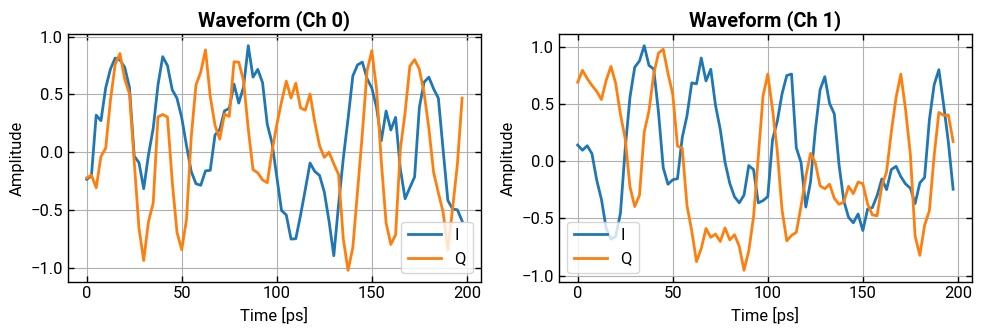

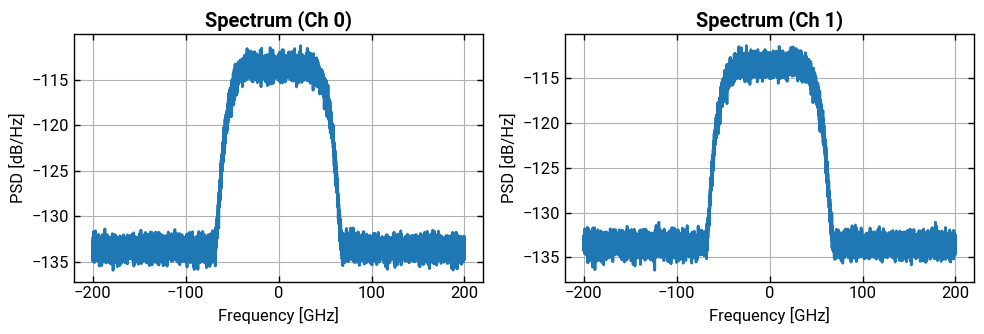

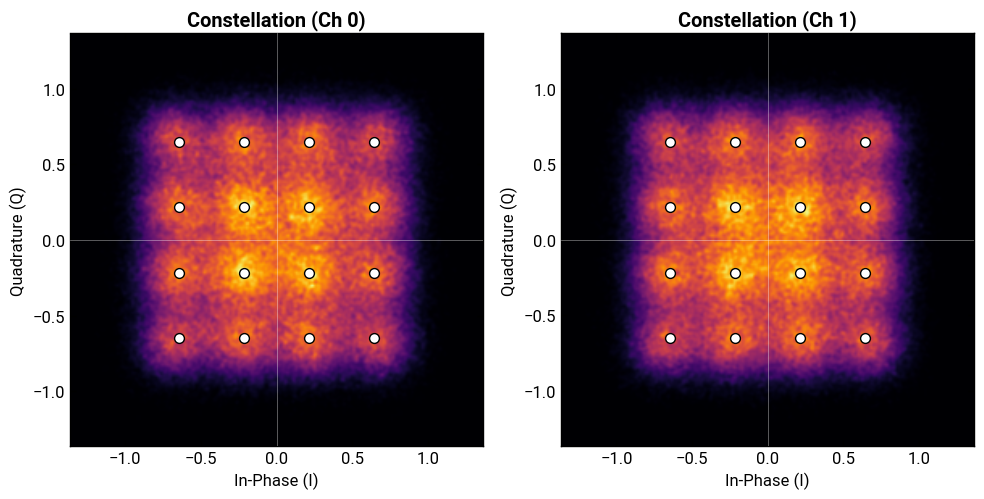

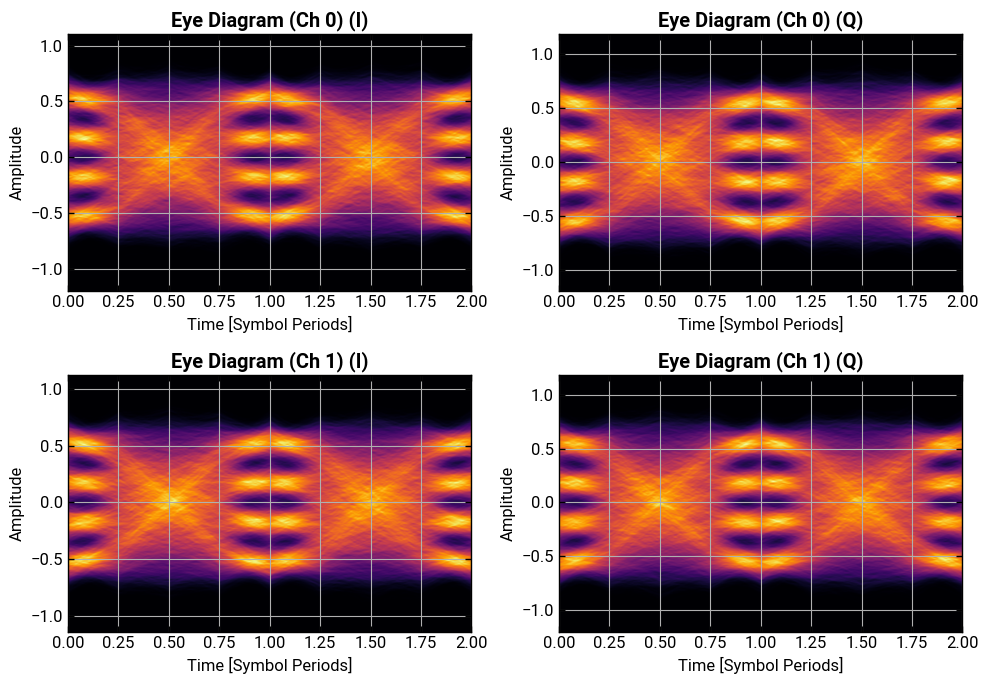

0.3280764


In [33]:
sig_4qam_n = add_awgn(sig_4qam, esn0_db=20)
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_constellation(show=True, overlay_ideal=True, bins=256)
sig_4qam_n.plot_eye(show=True)

print(np.var(sig_4qam_n.samples**2))


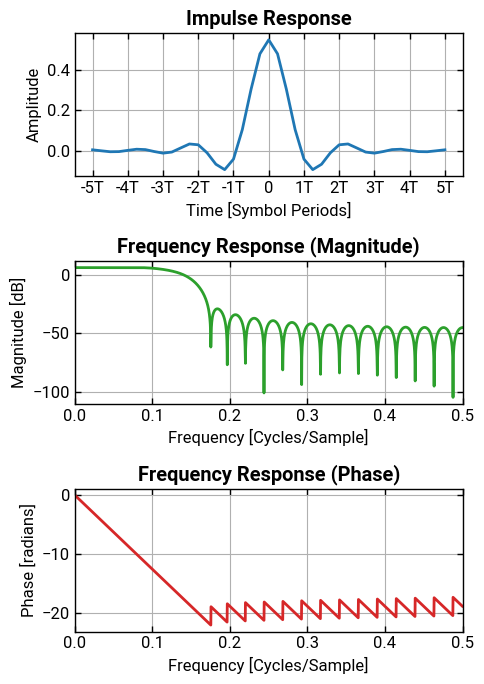

In [34]:
rrc_filter = sig_4qam_n.shaping_filter_taps()
filter_response(rrc_filter, sps=sps, show=True)


In [35]:
sig_4qam_n.matched_filter()


Signal(samples=array([[-0.21435463-0.3690512j , -0.08227926-0.4990605j ,
         0.20539413-0.46881192j, ..., -1.20175584-0.84715136j,
        -0.89557763-0.46031052j, -0.47015469-0.18191907j],
       [ 0.21384111+0.95056201j,  0.29589691+1.24026398j,
         0.26501112+1.37760159j, ...,  0.94325265-1.02398811j,
         0.69114121-0.61340187j,  0.41006204-0.24716431j]],
      shape=(2, 400000)), sampling_rate=400000000000.0, symbol_rate=100000000000.0, modulation_scheme='QAM', modulation_order=16, source_bits=array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], shape=(2, 400000), dtype=int8), source_symbols=array([[-0.31666762-0.31666762j,  0.95000285+0.31666762j,
         0.95000285+0.95000285j, ..., -0.95000285+0.95000285j,
         0.31666762-0.95000285j, -0.95000285-0.95000285j],
       [ 0.31639612+0.9491885j , -0.31639612+0.9491885j ,
        -0.9491885 +0.9491885j , ..., -0.31639612+0.9491885j ,
         0.31639612-0.31639612j,  0.9491885 -0.9491885j ]],
      sha

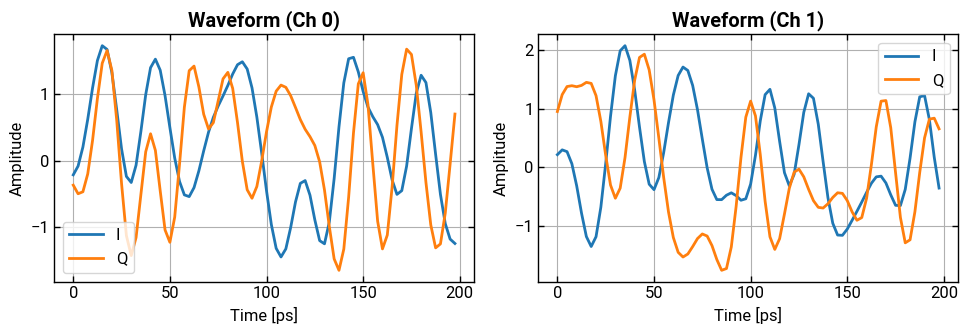

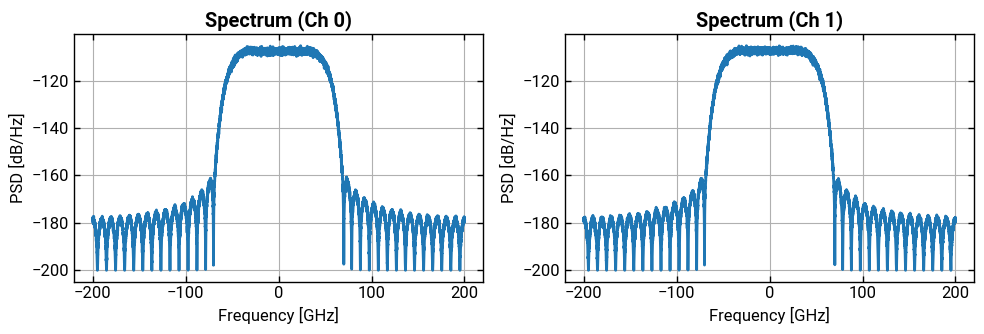

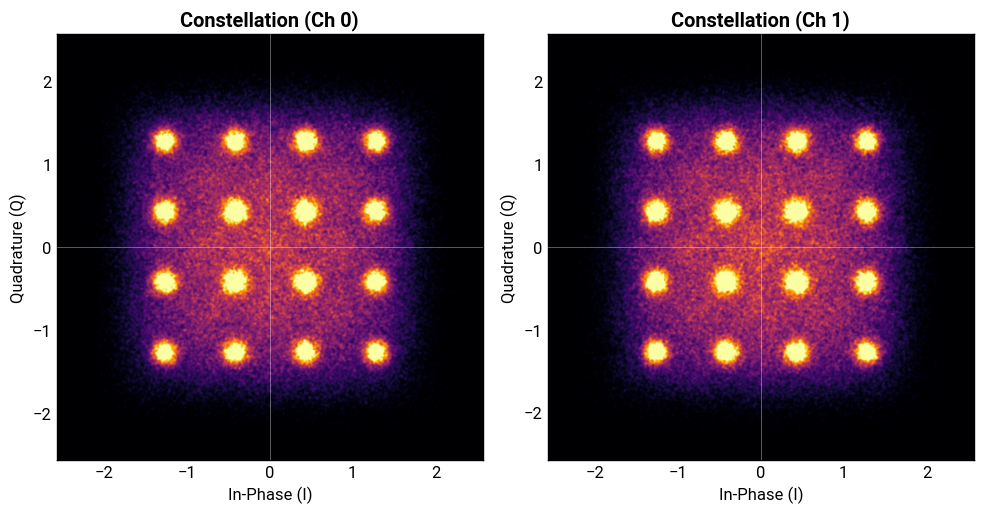

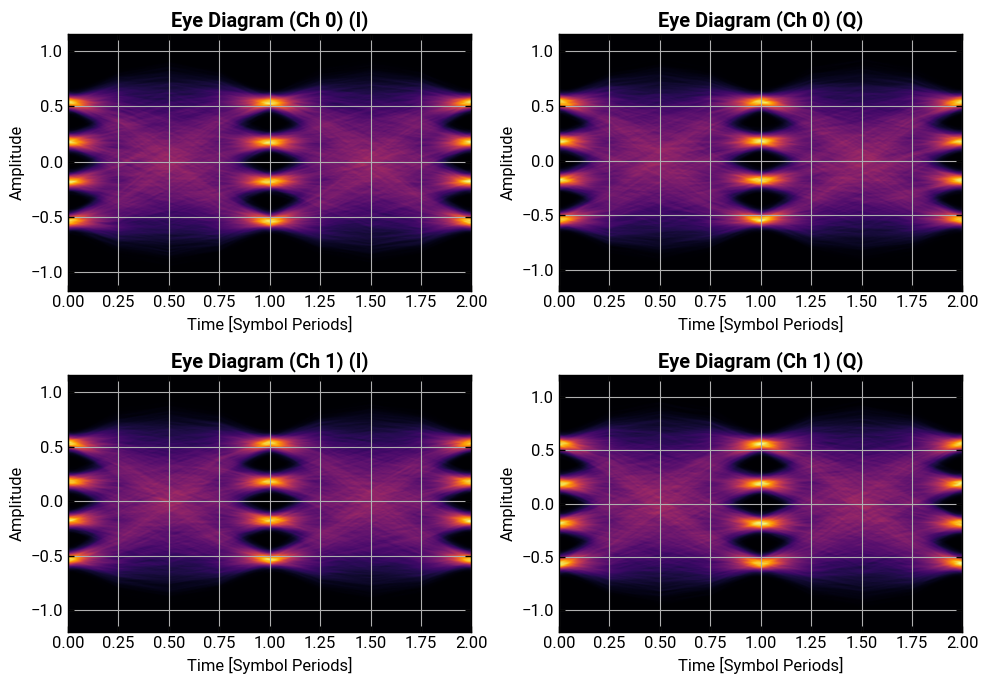

4.084458978373882


In [36]:
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_constellation(
    show=True, overlay_ideal=False, bins=512, vmin=0, vmax=0.5
)
sig_4qam_n.plot_eye(show=True)

print(np.var(sig_4qam_n.samples**2))


In [37]:
sig_4qam_n.print_info()


Property         Value
0        Spectral Domain      BASEBAND
1        Physical Domain           DIG
2      Modulation Scheme           QAM
3       Modulation Order            16
4            Symbol Rate  100.00 GBaud
5               Bit Rate   400.00 Gbps
6          Sampling Rate    400.00 GHz
7     Samples Per Symbol          4.00
8            Pulse Shape           RRC
9               Duration       1.00 µs
10      Center Frequency       0.00 Hz
11  Digital Freq. Offset       0.00 Hz
12               Backend           GPU
13         Configuration     MIMO (2x)
14         Samples Shape   (2, 400000)

In [38]:
sig_4qam_n.downsample_to_symbols()


Signal(samples=array([[-0.21435463-0.3690512j ,  1.09610843+0.30666561j,
         1.32251578+1.35706911j, ..., -1.24374452+1.46094882j,
         0.5057655 -1.30772589j, -1.21928919-1.28642147j],
       [ 0.21384111+0.95056201j, -0.32020101+1.374532j  ,
        -1.18832843+1.22231824j, ..., -0.3039242 +1.27948131j,
         0.30961473-0.50136483j,  1.10496227-1.35400982j]],
      shape=(2, 100000)), sampling_rate=100000000000.0, symbol_rate=100000000000.0, modulation_scheme='QAM', modulation_order=16, source_bits=array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], shape=(2, 400000), dtype=int8), source_symbols=array([[-0.31666762-0.31666762j,  0.95000285+0.31666762j,
         0.95000285+0.95000285j, ..., -0.95000285+0.95000285j,
         0.31666762-0.95000285j, -0.95000285-0.95000285j],
       [ 0.31639612+0.9491885j , -0.31639612+0.9491885j ,
        -0.9491885 +0.9491885j , ..., -0.31639612+0.9491885j ,
         0.31639612-0.31639612j,  0.9491885 -0.9491885j ]],
      sha

In [39]:
sig_4qam_n.print_info()
print(np.var(sig_4qam_n.samples**2))


Property         Value
0        Spectral Domain      BASEBAND
1        Physical Domain           DIG
2      Modulation Scheme           QAM
3       Modulation Order            16
4            Symbol Rate  100.00 GBaud
5               Bit Rate   400.00 Gbps
6          Sampling Rate    100.00 GHz
7     Samples Per Symbol          1.00
8            Pulse Shape           RRC
9               Duration       1.00 µs
10      Center Frequency       0.00 Hz
11  Digital Freq. Offset       0.00 Hz
12               Backend           GPU
13         Configuration     MIMO (2x)
14         Samples Shape   (2, 100000)

4.3668849179752485


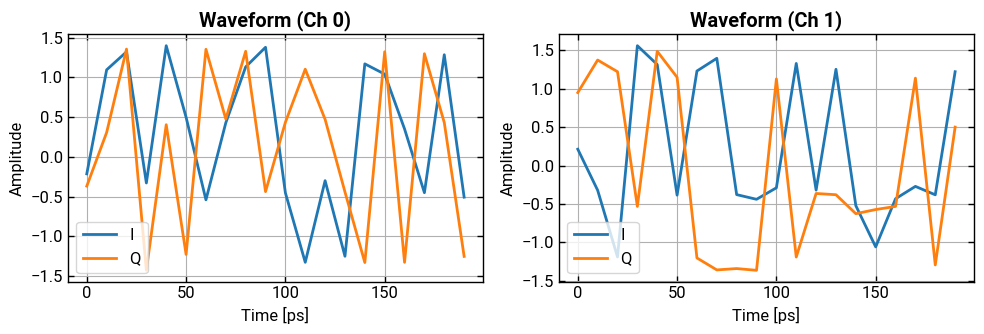

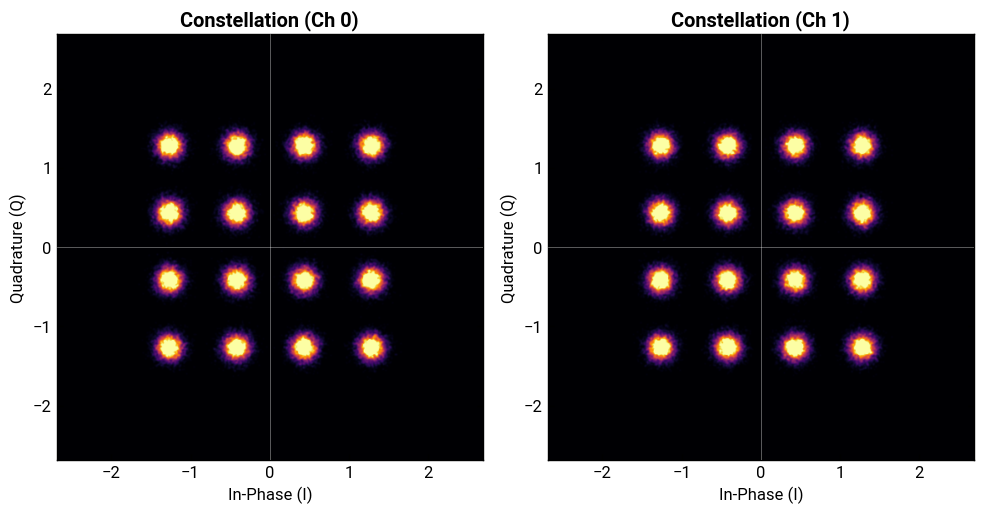

In [40]:
sig_4qam_n.plot_symbols(show=True, num_symbols=20)
sig_4qam_n.plot_constellation(
    show=True, overlay_ideal=False, bins=512, vmin=0, vmax=0.5
)


In [41]:
sig_tmp = sig_4qam_n.copy()
sig_tmp.spectral_domain = "PASSBAND"
sig_tmp.physical_domain = "OPT"
sig_tmp.center_frequency = 193.4144e12


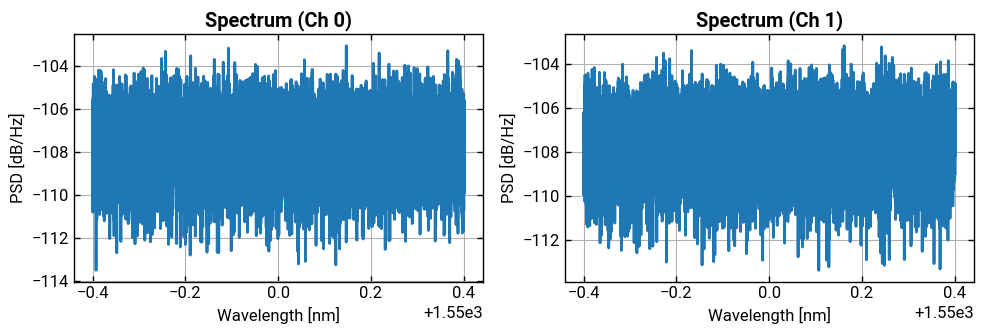

Property         Value
0        Spectral Domain      PASSBAND
1        Physical Domain           OPT
2      Modulation Scheme           QAM
3       Modulation Order            16
4            Symbol Rate  100.00 GBaud
5               Bit Rate   400.00 Gbps
6          Sampling Rate    100.00 GHz
7     Samples Per Symbol          1.00
8            Pulse Shape           RRC
9               Duration       1.00 µs
10      Center Frequency    193.41 THz
11  Digital Freq. Offset       0.00 Hz
12               Backend           GPU
13         Configuration     MIMO (2x)
14         Samples Shape   (2, 100000)

In [42]:
sig_tmp.plot_psd(show=True, x_axis="wavelength", nperseg=2**14)
sig_tmp.print_info()


In [43]:
sig_tmp = sig_4qam_n.copy()
sig_tmp.shift_frequency(30000e6)
# sig_4qam_n.resample(sps_out=2)


Signal(samples=array([[-0.21435463-0.3690512j , -0.63037246+0.94769618j,
        -0.27227254-1.87524724j, ..., -1.86493462+0.45087773j,
         0.35948911+1.35525397j, -0.84667844+1.55713903j],
       [ 0.21384111+0.95056201j, -1.20831006-0.72928301j,
         1.67983853-0.2903943j , ..., -0.99794009+0.85647996j,
         0.04421127+0.58759964j, -1.62919198-0.63246952j]],
      shape=(2, 100000)), sampling_rate=100000000000.0, symbol_rate=100000000000.0, modulation_scheme='QAM', modulation_order=16, source_bits=array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], shape=(2, 400000), dtype=int8), source_symbols=array([[-0.31666762-0.31666762j,  0.95000285+0.31666762j,
         0.95000285+0.95000285j, ..., -0.95000285+0.95000285j,
         0.31666762-0.95000285j, -0.95000285-0.95000285j],
       [ 0.31639612+0.9491885j , -0.31639612+0.9491885j ,
        -0.9491885 +0.9491885j , ..., -0.31639612+0.9491885j ,
         0.31639612-0.31639612j,  0.9491885 -0.9491885j ]],
      sha

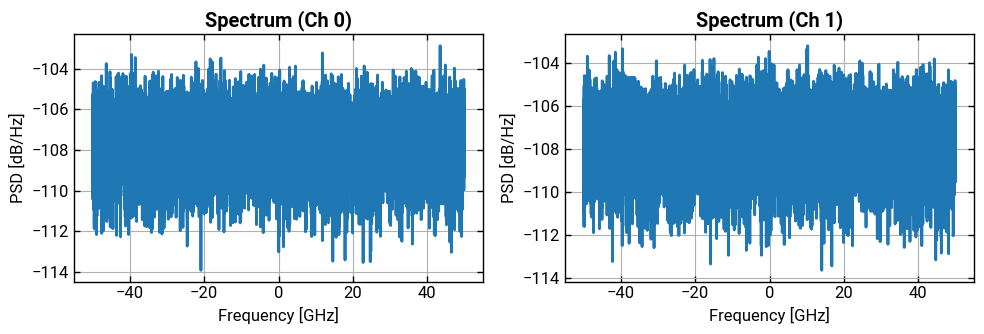

In [44]:
sig_tmp.plot_psd(show=True, nperseg=2**14)


In [45]:
sig_tmp.print_info()


Property         Value
0        Spectral Domain      BASEBAND
1        Physical Domain           DIG
2      Modulation Scheme           QAM
3       Modulation Order            16
4            Symbol Rate  100.00 GBaud
5               Bit Rate   400.00 Gbps
6          Sampling Rate    100.00 GHz
7     Samples Per Symbol          1.00
8            Pulse Shape           RRC
9               Duration       1.00 µs
10      Center Frequency       0.00 Hz
11  Digital Freq. Offset     30.00 GHz
12               Backend           GPU
13         Configuration     MIMO (2x)
14         Samples Shape   (2, 100000)

In [46]:
import numpy as np

print(np.var(sig_4qam.samples[0]))
print(np.var(sig_4qam.samples[0].real))
print(np.var(sig_4qam.samples[0].imag))


0.44768375
0.224081
0.22360271


In [47]:
np.vdot(sig_4qam.samples[0], sig_4qam.samples[0]).real / sig_4qam.samples[0].shape[0]


array(0.44769434)

In [48]:
np.dot(sig_4qam.samples[0], sig_4qam.samples[0])


array(187.0856+109.83606j, dtype=complex64)

In [49]:
sig_4qam.samples[0].shape


(400000,)

In [50]:
gray_constellation(modulation="qam", order=64).max()


np.complex128(1.0801234497346435+1.0801234497346435j)